Machine Learning 3 point percentage

In [1]:
from google.colab import files
uploaded = files.upload()

Saving NBA_2021.csv to NBA_2021.csv


In [2]:
import pandas as pd
df = pd.read_csv('NBA_2021.csv')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,...,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
701,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,...,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
702,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
703,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


Data Seperation to X and y

In [40]:
y = df['3P%']
y

,3P%
0,0.000
1,0.000
2,0.000
3,0.250
4,0.388
...,...
700,0.398
701,0.267
702,0.343
703,0.143


In [46]:
X = df.drop(columns=['Player', 'Pos', 'Tm', '3P%'])
X

#Combine and drop NaNs from both X and y. This joins your features (X) and target (y) side by side into a single DataFrame called data.
data = pd.concat([X, y], axis=1)
data = data.dropna()

#Split again
X_clean = data.drop(columns=['3P%'])
y_clean = data['3P%']




Data Splitting 80-20

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=100)

In [48]:
X_train

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
199,27,2,0,20.0,4.0,10.5,0.381,1.5,4.5,2.5,...,0.000,1.5,2.0,3.5,2.5,1.5,0.5,1.5,2.0,9.5
198,27,10,0,13.6,2.0,5.7,0.351,0.9,2.8,1.1,...,0.778,0.5,1.4,1.9,2.2,0.7,0.3,0.3,1.1,5.6
375,22,11,0,6.8,0.5,1.9,0.238,0.2,1.4,0.3,...,0.500,0.2,0.8,1.0,0.4,0.5,0.4,0.8,0.6,1.2
614,34,56,25,27.3,2.8,6.8,0.415,1.2,3.6,1.6,...,0.800,0.5,2.3,2.9,2.2,0.8,0.5,1.0,2.3,7.6
373,22,21,0,6.0,0.5,1.5,0.344,0.3,1.0,0.2,...,0.750,0.2,0.9,1.1,0.5,0.4,0.2,0.6,0.8,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,35,11,0,9.0,0.4,1.5,0.235,0.4,1.3,0.0,...,0.833,0.3,0.6,0.9,0.2,0.3,0.2,0.3,0.6,1.5
59,28,66,36,20.4,2.2,3.7,0.587,0.0,0.0,2.2,...,0.448,2.1,3.2,5.3,1.2,0.3,1.1,1.1,2.1,5.0
387,27,64,42,15.3,2.7,4.3,0.615,0.1,0.4,2.5,...,0.629,1.2,2.8,4.1,0.8,0.3,1.0,0.9,2.0,6.6
91,25,67,67,29.8,6.4,15.4,0.419,1.9,5.6,4.5,...,0.815,0.8,2.1,2.9,2.3,1.2,0.4,1.8,3.5,17.2


In [49]:
X_test

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
299,28,38,5,19.1,1.9,5.3,0.363,0.7,2.2,1.3,...,0.750,0.5,1.4,1.9,1.2,0.5,0.1,0.8,1.6,4.7
420,26,4,1,19.8,2.3,6.0,0.375,0.5,1.3,1.8,...,0.714,0.8,2.3,3.0,3.0,0.0,0.0,1.3,1.8,6.3
500,25,59,26,25.6,3.7,9.9,0.374,1.7,5.5,2.0,...,0.800,0.6,2.8,3.4,2.9,0.9,0.2,1.4,2.0,10.4
629,26,14,1,5.2,0.5,1.5,0.333,0.2,0.6,0.3,...,0.000,0.1,0.3,0.4,0.3,0.4,0.1,0.3,0.2,1.2
621,24,28,1,13.4,1.3,3.6,0.366,0.5,1.9,0.8,...,0.667,0.3,1.5,1.8,0.9,0.5,0.3,0.6,1.3,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,24,59,16,24.0,4.3,8.4,0.517,0.3,1.3,4.0,...,0.690,1.6,3.9,5.6,1.6,1.0,0.9,0.6,1.4,10.3
569,34,18,1,20.4,2.8,5.8,0.486,1.1,2.4,1.8,...,1.000,0.8,2.3,3.1,5.8,1.0,0.1,2.2,1.6,7.6
302,20,65,4,20.1,3.4,7.5,0.458,0.6,2.0,2.9,...,0.775,0.4,2.2,2.6,2.8,1.0,0.3,1.6,2.0,9.0
405,25,23,9,15.6,1.9,3.9,0.478,0.6,1.7,1.3,...,0.652,0.4,3.3,3.7,0.6,0.3,0.0,0.3,0.6,5.0


Model Building- Linear Regression - Training The Model

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Applying The Model To Make A Predication

In [51]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [52]:
y_lr_train_pred

array([ 0.2326042 ,  0.30242497,  0.06461912,  0.33235921,  0.31448817,
        0.31843193,  0.31670721,  0.36598139,  0.18012087,  0.20760934,
        0.34781262,  0.28901652,  0.3830134 ,  0.57103927,  0.09864488,
        0.33331553,  0.31176279,  0.33938919,  0.31938279,  0.24246965,
        0.41363679,  0.22216002,  0.44269147,  0.32754232,  0.29040304,
        0.31536774,  0.49940285,  0.24528466,  0.49698694,  0.38615747,
        0.34717957,  0.3340013 ,  0.20829055,  0.28343859,  0.48397149,
        0.32891691,  0.36503115,  0.33927512,  0.28789582,  0.21205827,
        0.38265525,  0.39840367,  0.26921167,  0.49788169,  0.38319856,
        0.17609887,  0.29876482,  0.42033401,  0.34868813,  0.50670886,
        0.36843475,  0.26467424,  0.17518567,  0.39948841,  0.3673454 ,
        0.2551966 ,  0.24774201,  0.2634979 ,  0.25351016,  0.35216739,
        0.30396622,  0.29843257,  0.01870368,  0.27932646,  0.35366893,
        0.26573657,  0.2848895 ,  0.28583723,  0.3854598 ,  0.39

In [53]:
y_lr_test_pred

array([0.27279134, 0.31133484, 0.27748627, 0.26197206, 0.27953704,
       0.37295291, 0.26889292, 0.29035706, 0.36832568, 0.2480489 ,
       0.39533524, 0.0310585 , 0.18161884, 0.32779593, 0.34112966,
       0.24690109, 0.40247347, 0.31560861, 0.22653765, 0.15212506,
       0.29087684, 0.18531205, 0.14664676, 0.43207203, 0.31454201,
       0.2639684 , 0.40504909, 0.35341794, 0.03612581, 0.37708196,
       0.34551359, 0.33488207, 0.40332944, 0.23759497, 0.67856546,
       0.22959207, 0.07583673, 0.39349055, 0.36438008, 0.42974179,
       0.38470216, 0.40963554, 0.13225625, 0.38049144, 0.38618769,
       0.36823976, 0.51719553, 0.31236243, 0.35048476, 0.28482578,
       0.23730543, 0.2946471 , 0.2749564 , 0.21152466, 0.35535024,
       0.16946874, 0.30380159, 0.35111384, 0.31034129, 0.33864281,
       0.26959231, 0.43361454, 0.26092575, 0.63910479, 0.3962594 ,
       0.38847254, 0.2786383 , 0.34902061, 0.40481218, 0.24842489,
       0.43857408, 0.38190454, 0.25510849, 0.29238273, 0.30383

Evaluate model performance

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [55]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.006734891444585509
LR R2 (Train):  0.5714403606758659
LR MSE (Test):  0.005051457201849411
LR R2 (Test):  0.6013943149099767


In [57]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.006735,0.57144,0.005051,0.601394


Random Forrest

Training The Model

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

Applying the model to make a prediction

In [60]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

Evaluate model performance

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [63]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.007222,0.540447,0.006304,0.502591


Model Comparison

In [64]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop = True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.006735,0.57144,0.005051,0.601394
1,Random Forest,0.007222,0.540447,0.006304,0.502591


Data visualization of predication results

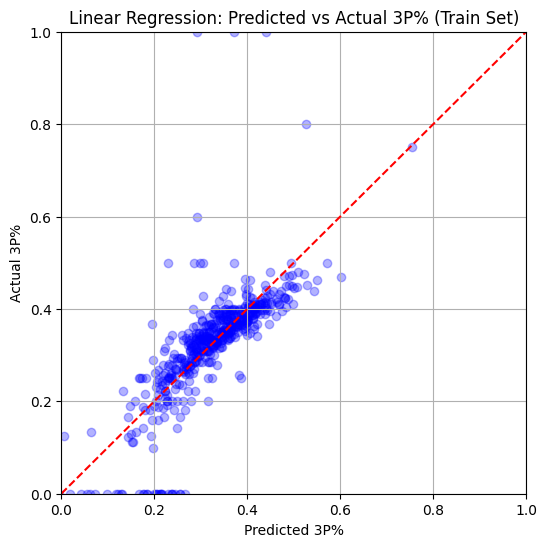

In [67]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))
plt.scatter(y_lr_train_pred, y_train, color='blue', alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # ideal line

plt.xlabel("Predicted 3P%")
plt.ylabel("Actual 3P%")
plt.title("Linear Regression: Predicted vs Actual 3P% (Train Set)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()
